In [2]:
import pandas as pd
import numpy as np
import math
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
Climate_df=pd.read_csv("Climate_dictionary.csv",index_col=0)
Group_dict_df = pd.read_csv("Groups_dictionary.csv",index_col=0)
dataset_df = pd.read_csv("Final_clean_dataSet.csv",index_col=0)
full_df = pd.read_csv("Final_clean_Loc_df.csv",index_col=0)
Stones_Grouped_df = pd.read_csv("Groups_dictionary.csv",index_col=0)
Stones_appear = pd.read_csv("Stones_Appearence.csv",index_col=0)
Corr_values = pd.read_csv("Corr_values_table.csv",index_col=0)
Corr_names = pd.read_csv("Corr_names_table.csv",index_col=0)

In [14]:
dataset_df.head()

,Climate,Latitude,Longitude,Ag,Al,As,Au,B,Ba,Be,...,Ti,Tl,U,V,W,Y,Yb,Zn,Zr,Group_Label
0,15,31.261220,35.214581,1,1,0,0,1,1,0,...,1,0,1,1,0,1,0,1,1,7
1,15,32.620121,35.014771,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,15,31.795924,35.211981,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,7
3,15,32.607559,35.289086,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,7,31.261220,35.214581,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,7


In [4]:
full_df.head()

,Location URL,Stone Refernced,Minerals Recorded,Location Name,Rock Types,Climate,Decimal Coordinates,Minerals,Latitude,Longitude,...,Ti,Tl,U,V,W,Y,Yb,Zn,Zr,Group_Label
0,https://www.mindat.org/loc-14762.html,Lapis Lazuli Unakite,Copper Gemstones,",i,Israel,Country,",Alkalibasalt Analcimite Basalt Basanite Brecci...,15,"31.2612199,35.214581",Ag Al B Ba C Ca Ce Cl Cr Cu F Fe Gd H K La Mg ...,31.261220,35.214581,...,1,0,1,1,0,1,0,1,1,7
1,https://www.mindat.org//loc-145486.html,Lapis Lazuli Unakite,NaN,", Israel,i,Central District (HaMerkaz District...",NaN,15,"32.620121002197266,35.0147705078125",NaN,32.620121,35.014771,...,0,0,0,0,0,0,0,0,0,7
2,https://www.mindat.org//loc-145489.html,Lapis Lazuli Unakite,Gemstones,", Israel,i,Haifa District,District, Israel,Cou...",Alkalibasalt Kimberlite Peridotite Pyroxenite ...,15,"31.7959242,35.2119808",Al B C Ca Cl Cr F Fe H K Mg N Na O P Si Sn Ti ...,31.795924,35.211981,...,1,0,0,1,0,0,0,0,1,7
3,https://www.mindat.org//loc-145488.html,Lapis Lazuli Unakite,NaN,", Israel,i,Jerusalem District,District, Israel...",NaN,15,"32.6075587,35.2890861",Al C Ca H O Si,32.607559,35.289086,...,0,0,0,0,0,0,0,0,0,7
4,https://www.mindat.org//loc-205351.html,Lapis Lazuli Unakite,NaN,", Israel,i,Northern District (HaZafon District...",Basalt Dolerite Melanocraticnephelinolite Neph...,7,"31.2612199,35.214581",Al C Ca Cl Fe H K Mg Mn Na Ni O Si Ti Zn,31.261220,35.214581,...,1,0,0,0,0,0,0,1,0,7


Climate Level meaning is in Climate_df.
Stones in every group is in Group_dict_df.
All of the features are categorical features.
Y column is the Group_Label. (For the supervised learning models)

In [5]:
# for col in dataset_df.columns:
#     corr = dataset_df["Group_Label"].corr(dataset_df[col])
#     print(col,": ",corr)

In [6]:
Country_df = pd.DataFrame(index=[1])

def create_countries_Df(Country_df, flag):
    for ind in full_df.index:
        iden_Con = full_df["Location Name"][ind].find("Country")
        Country = full_df["Location Name"][ind][iden_Con-15:iden_Con]
        if((str(full_df["Location Name"][ind]).find("Constituent"))!=-1 or (str(full_df["Location Name"][ind]).find("Continen"))!=-1):
            Country1 = (full_df["Location Name"][ind][iden_Con-30:iden_Con])
            if(Country1.find("Greenland")!=-1): Country=" Greenland"
            if(Country1.find("England")!=-1): Country = " England"
            if(Country1.find("Antarctica")!=-1): Country = " Antarctica"
        while(Country.find(',')!=-1):
            comma = Country.find(',')
            Country = Country[comma+1:-1]
            if(Country==' Ital'):
                Country = " Italy"
            if(Country==' Indi'):
                Country = " India"
            if(Country==' Brazi'):
                Country = " Brazil"
            if(Country==' US'):
                Country = " USA"
        if(Country==''):
            if(str(full_df["Location Name"][ind][iden_Con-30:iden_Con]).find("Czech")!=-1): Country = "Czech"
            if(str(full_df["Location Name"][ind][iden_Con-30:iden_Con]).find("Papua New Guinea")!=-1): Country = "Papua New Guinea"  
            if(str(full_df["Location Name"][ind][iden_Con-30:iden_Con]).find("Macedonia")!=-1): Country = "Macedonia"  
            if(str(full_df["Location Name"][ind][iden_Con-30:iden_Con]).find("Dominican Republic")!=-1): Country = "Dominican Republic"

               
        if(flag==0):
            if(str(Country)=="Continen"): 
                if(str(full_df["Location Name"][ind][iden_Con-30:iden_Con]).find("Antarctica")!=-1): Country = "Antarctica"
                else:print(Country)
            Country_df[Country] = 0
        else:
            Country_df[Country] = Country_df[Country] +1
    return Country_df
Country_df = create_countries_Df(Country_df, 0)
Country_df = create_countries_Df(Country_df, 1)

In [7]:
for col in Country_df.columns:
    if(Country_df[col][1]>20):
        print(col,"showes: ",Country_df[col][1],"times")
    else:
        Country_df.drop([col],axis=1,inplace=True)
Country_df = Country_df.T.sort_values([1], ascending=False)

 Austria showes:  84 times
 USA showes:  379 times
 Brazil showes:  25 times
 Canada showes:  83 times
 France showes:  60 times
 Germany showes:  72 times
 India showes:  26 times
 Italy showes:  80 times
 Norway showes:  86 times
 Russia showes:  33 times
 Switzerland showes:  31 times
 England showes:  21 times
 Australia showes:  79 times
 China showes:  50 times
 Sweden showes:  26 times
 Myanmar showes:  23 times
 Spain showes:  22 times


Text(0.5, 0, 'Country')

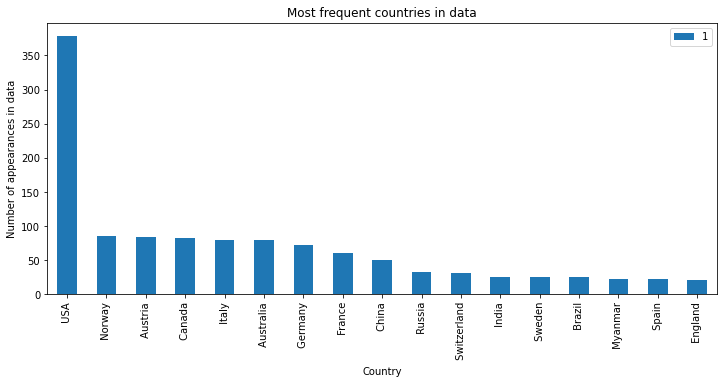

In [8]:
fig, ax = plt.subplots(figsize=(12,5))
ax = Country_df.plot(kind='bar',ax=ax)
ax.set_title("Most frequent countries in data")
ax.set_ylabel("Number of appearances in data")
ax.set_xlabel("Country")

Text(0.5, 0, 'Group Numbers (1-8)')

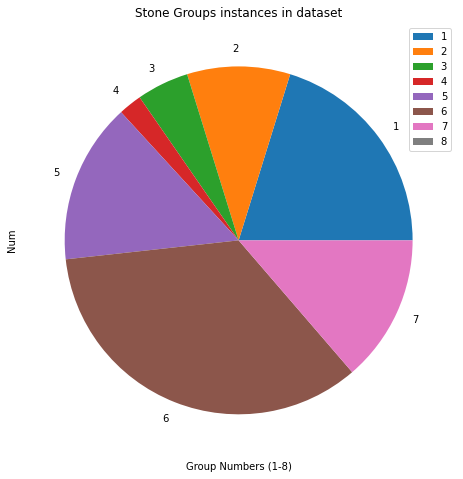

In [9]:
Stones_Groups_df = pd.DataFrame(index=[1,2,3,4,5,6,7,8], columns=["Num"])
for i in range(8):
    Stones_Groups_df["Num"][i+1] = 0
    
for ind in full_df.index:
    Stones_Groups_df["Num"][full_df["Group_Label"][ind]] = Stones_Groups_df["Num"][full_df["Group_Label"][ind]] + 1

Stones_Groups_df
fig, ax = plt.subplots(figsize=(10,8))
ax = Stones_Groups_df.plot(kind='pie',y="Num",ax=ax)
ax.set_title("Stone Groups instances in dataset")
ax.set_xlabel("Group Numbers (1-8)")

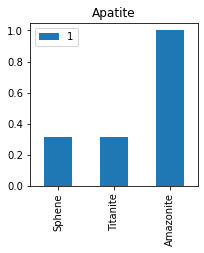

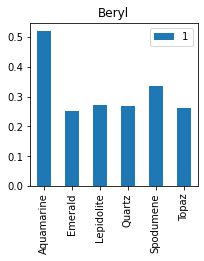

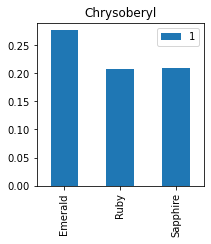

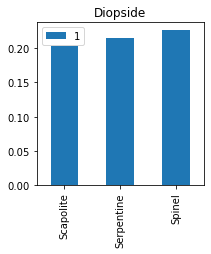

In [93]:
# showing a little stone's correlations
for ind in Corr_values.index:
    if(ind=="Smoky" or ind=="Ruby" or ind=="Rose" or ind=="Morganite" or ind=="Moonstone" or ind=="Goshenite" or ind=="Heliodor"or ind=="Lepidolite" or ind=="Quartz"): continue
    stone_name = ind
    stones_corr_names = []
    stones_corr_values = []
    for col in Corr_values.columns:
        if(ind==col):continue
        if(col=="Smoky" or col=="Rose" or col=="Morganite" or col=="Moonstone" or col=="Goshenite" or col=="Heliodor"): continue
        if(Corr_values[col][ind]!=None):
            if(Corr_values[col][ind]):
                if(Corr_values[col][ind]>0):
                    stones_corr_names.append(col)
                    stones_corr_values.append(Corr_values[col][ind])
    
    if(len(stones_corr_names)>2 and len(stones_corr_values)>2):
        stones_corr_df = pd.DataFrame(index=stones_corr_names,columns=[1])
        stones_corr_df[1] = stones_corr_values
        fig, ax = plt.subplots(figsize=(3,3))
        ax = stones_corr_df.plot(kind='bar',ax=ax)
        ax.set_title(stone_name)


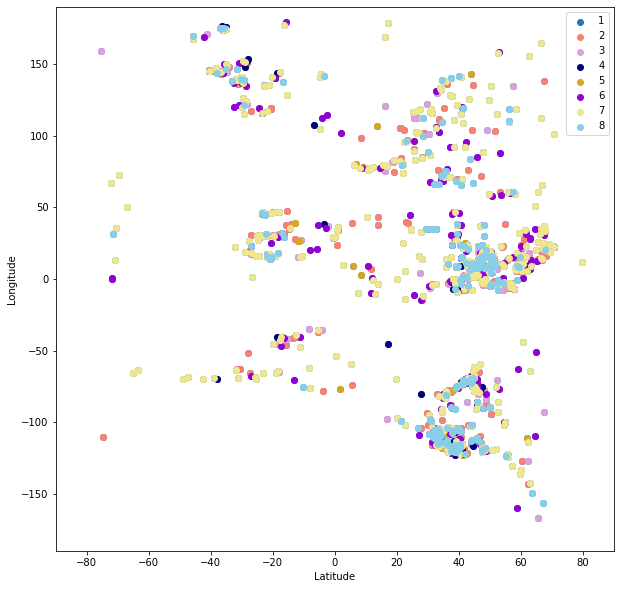

In [94]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.set_ylim(-190,190)
ax.set_xlim(-90,90)

ax.scatter(full_df.Latitude, full_df.Longitude)
colours_list = ['salmon','plum','navy','goldenrod','darkviolet','khaki','skyblue','black']
colours_df = pd.DataFrame(index=[1,2,3,4,5,6,7,8],columns=["Colour"])
colours_df["Colour"] = colours_list
for i in colours_df.index:
    colour =colours_list[i-1]
    ax.scatter(full_df.Latitude[full_df.Group_Label==i], full_df.Longitude[full_df.Group_Label==i], c=colour)
ax.legend(labels=['1','2', '3','4','5','6','7','8'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.savefig('stones_groups_by_Lan&long_color.png', transparent = True)

In [127]:
dataset_df

,Climate,Latitude,Longitude,Ag,Al,As,Au,B,Ba,Be,...,Ti,Tl,U,V,W,Y,Yb,Zn,Zr,Group_Label
0,15,31.261220,35.214581,1,1,0,0,1,1,0,...,1,0,1,1,0,1,0,1,1,7
1,15,32.620121,35.014771,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,15,31.795924,35.211981,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,7
3,15,32.607559,35.289086,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,7,31.261220,35.214581,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,13,47.204830,12.247430,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5
1604,15,47.056400,11.908560,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,5
1605,12,40.878890,115.344720,1,1,1,1,1,0,0,...,0,0,0,0,1,0,0,1,0,6
1606,2,34.458330,110.083330,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,7


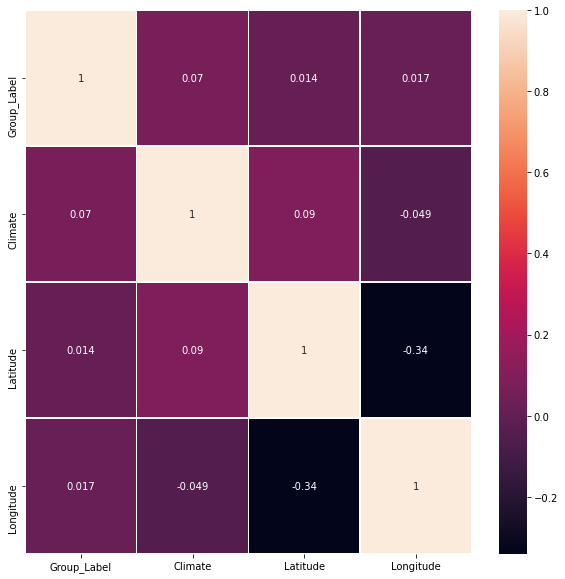

In [104]:
dataset_df1 = pd.DataFrame(dataset_df, columns =['Group_Label','Climate','Latitude','Longitude'])
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataset_df1.corr(), annot=True, linewidths=.5, ax=ax)

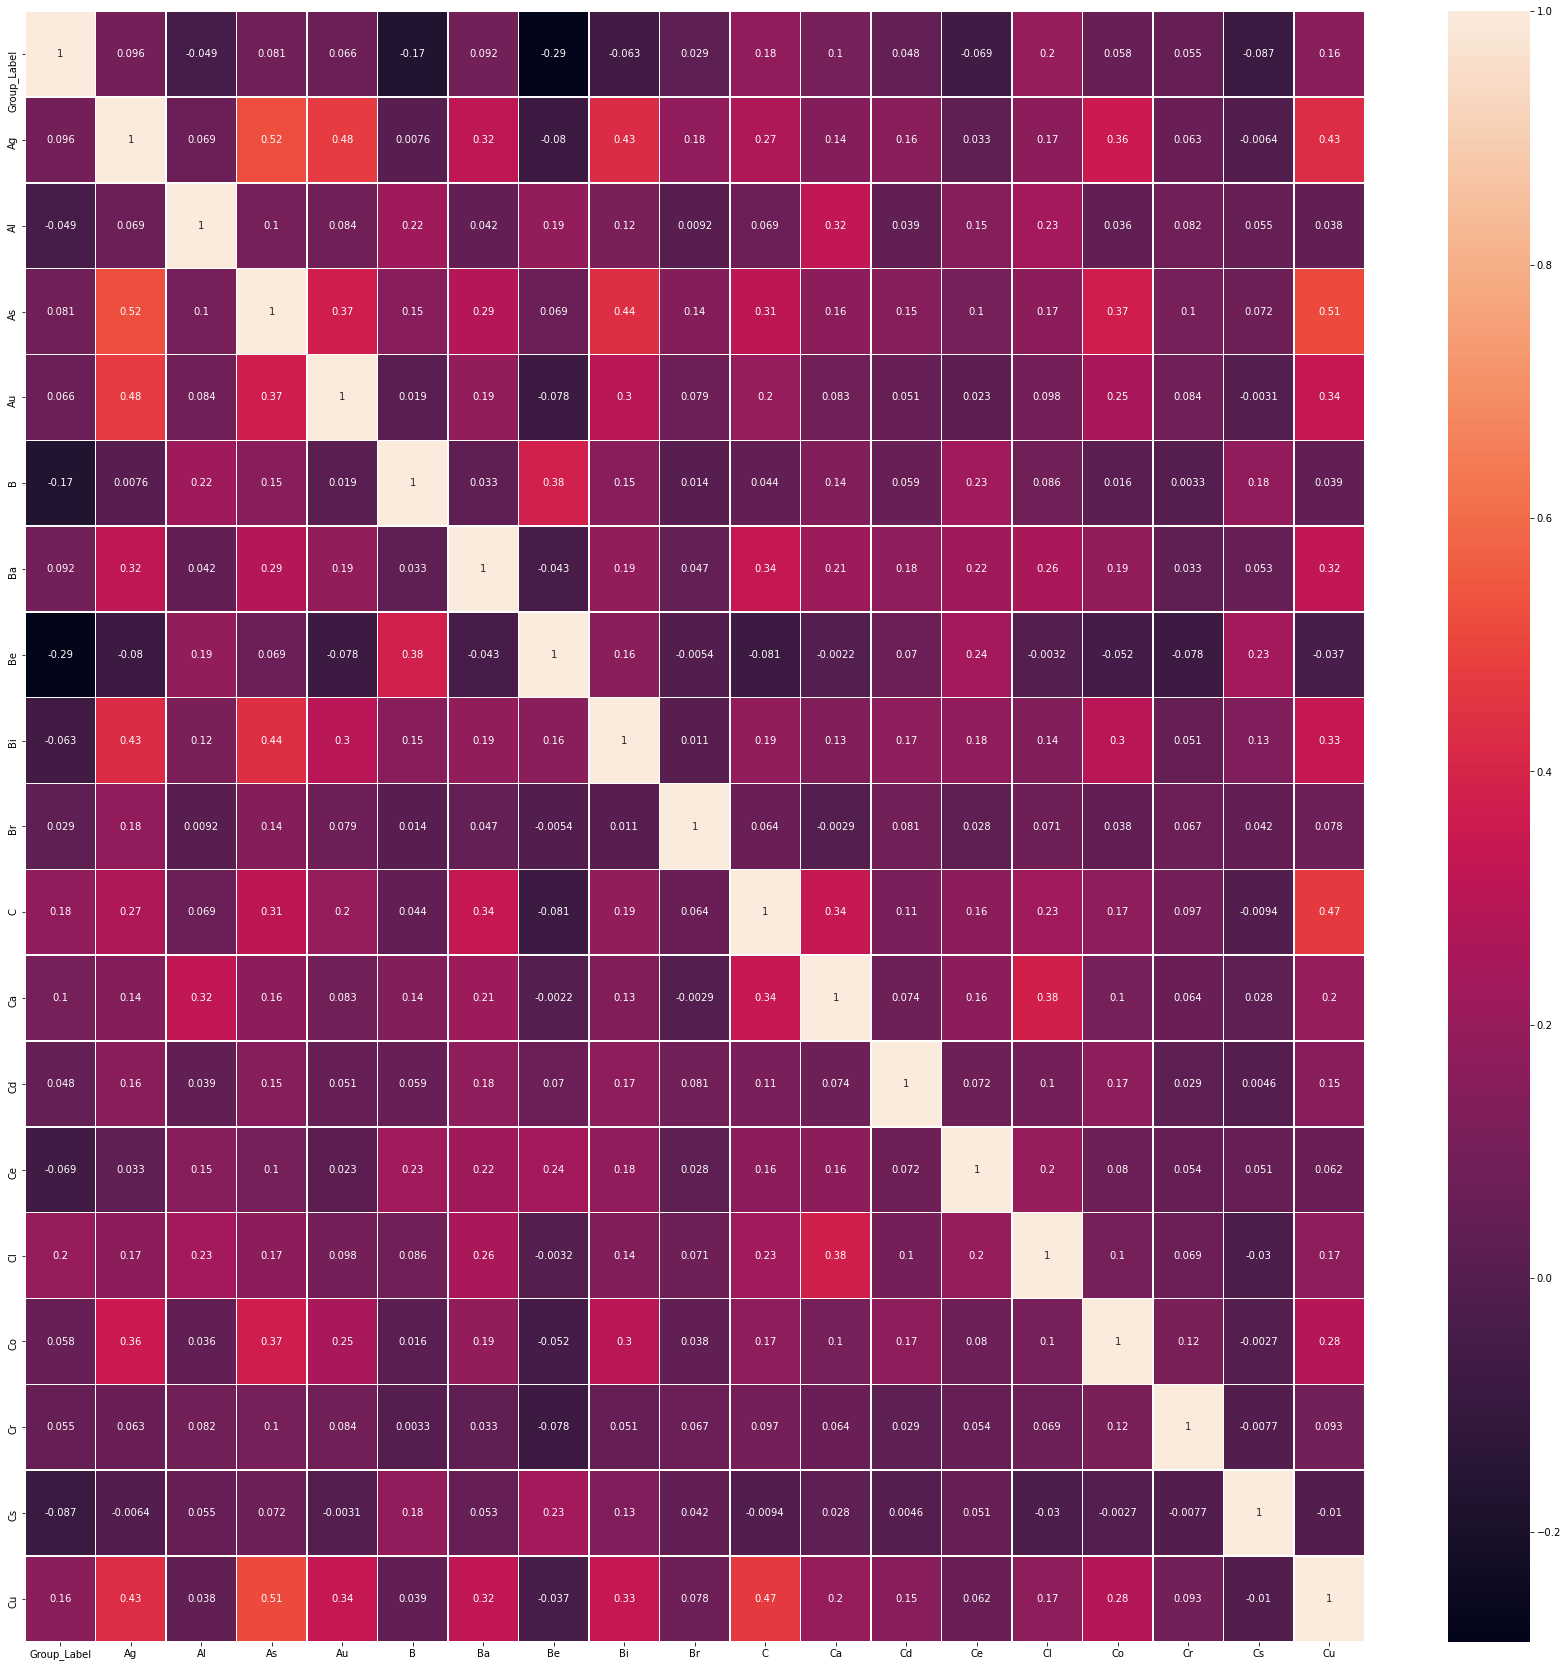

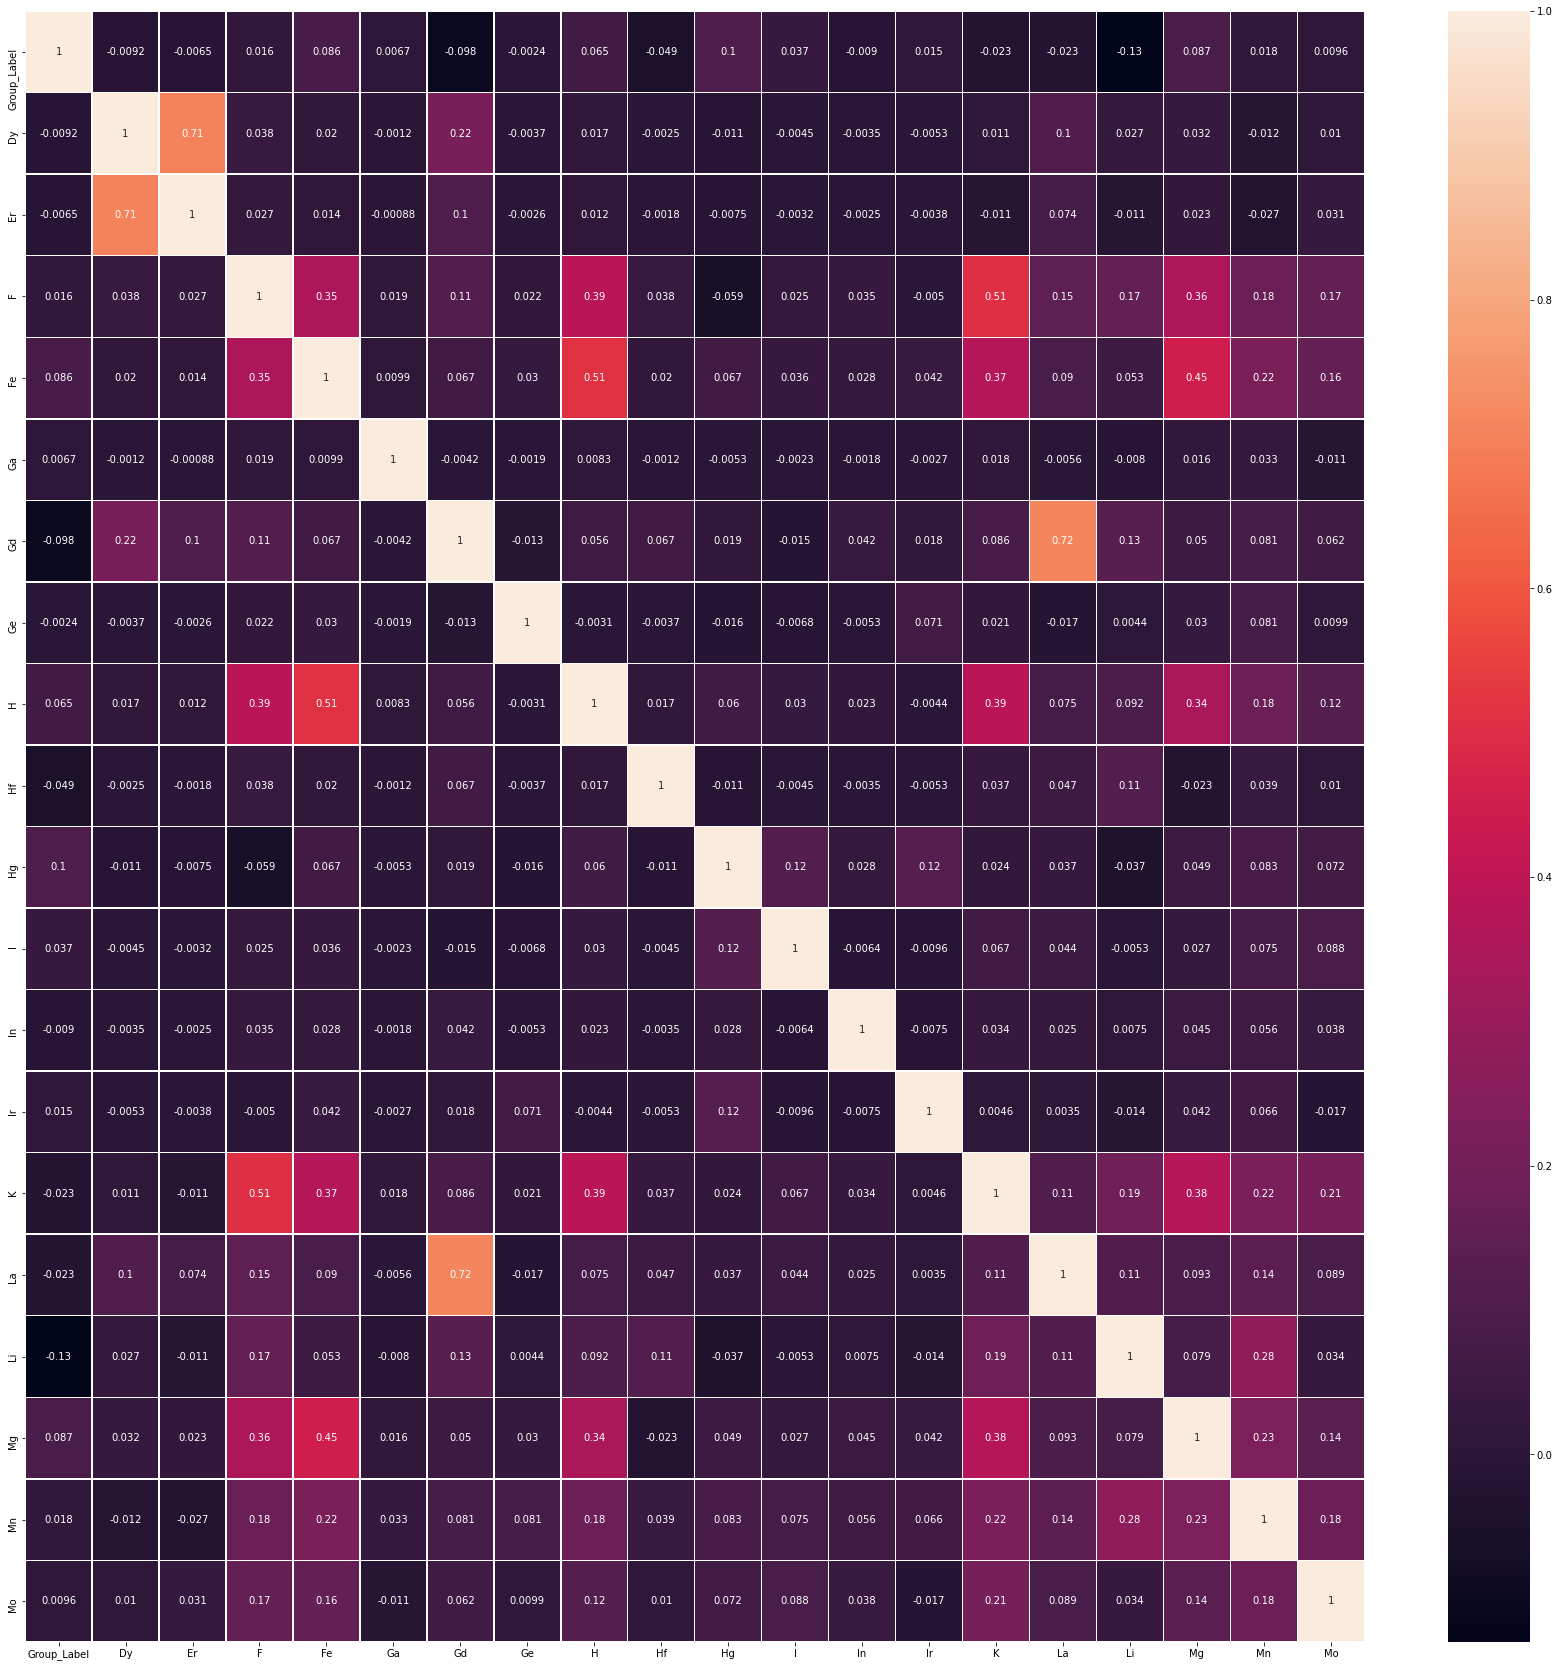

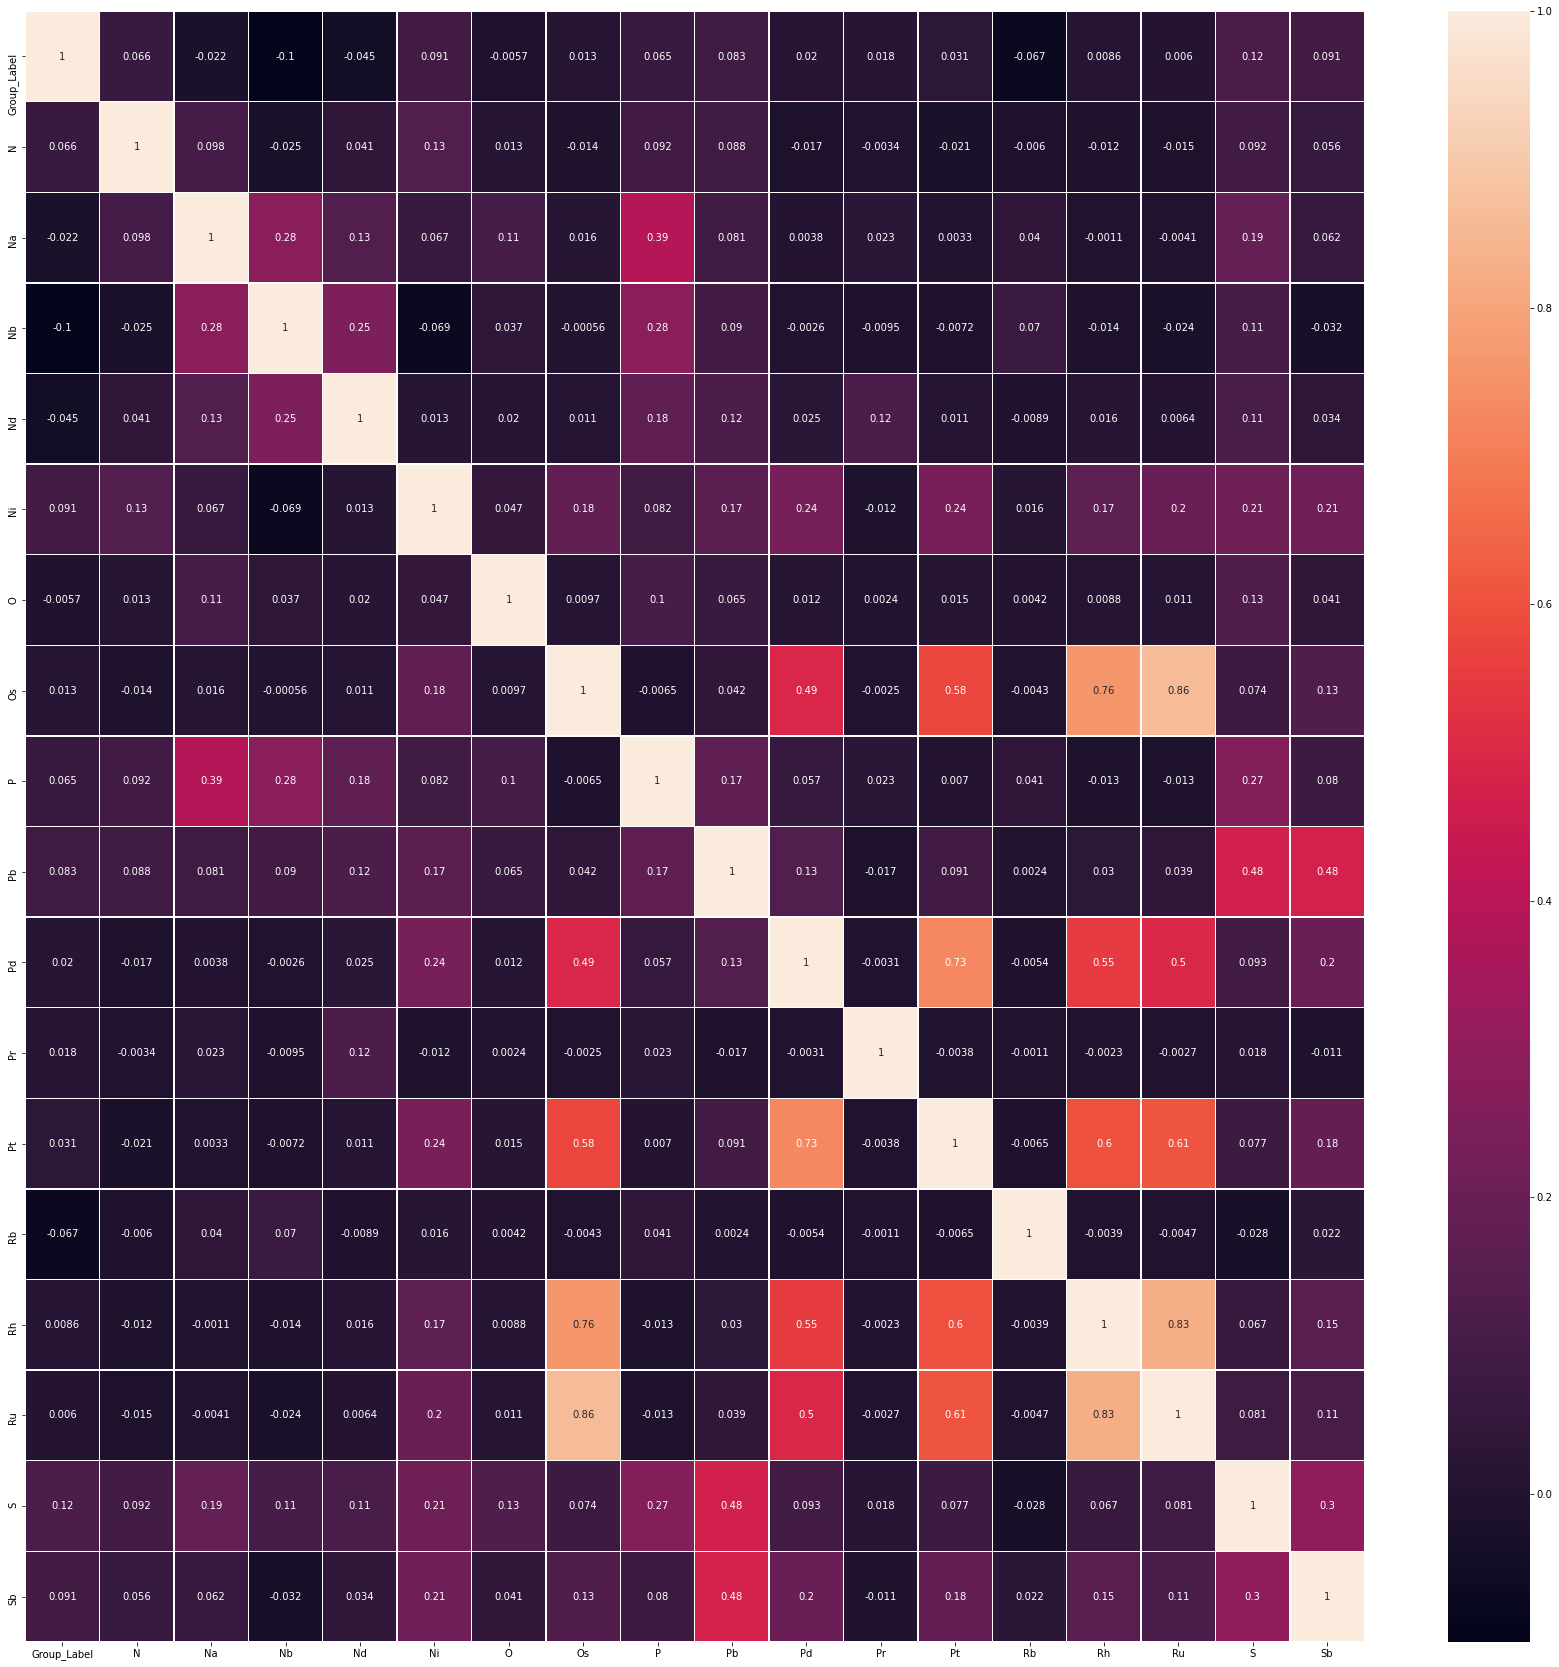

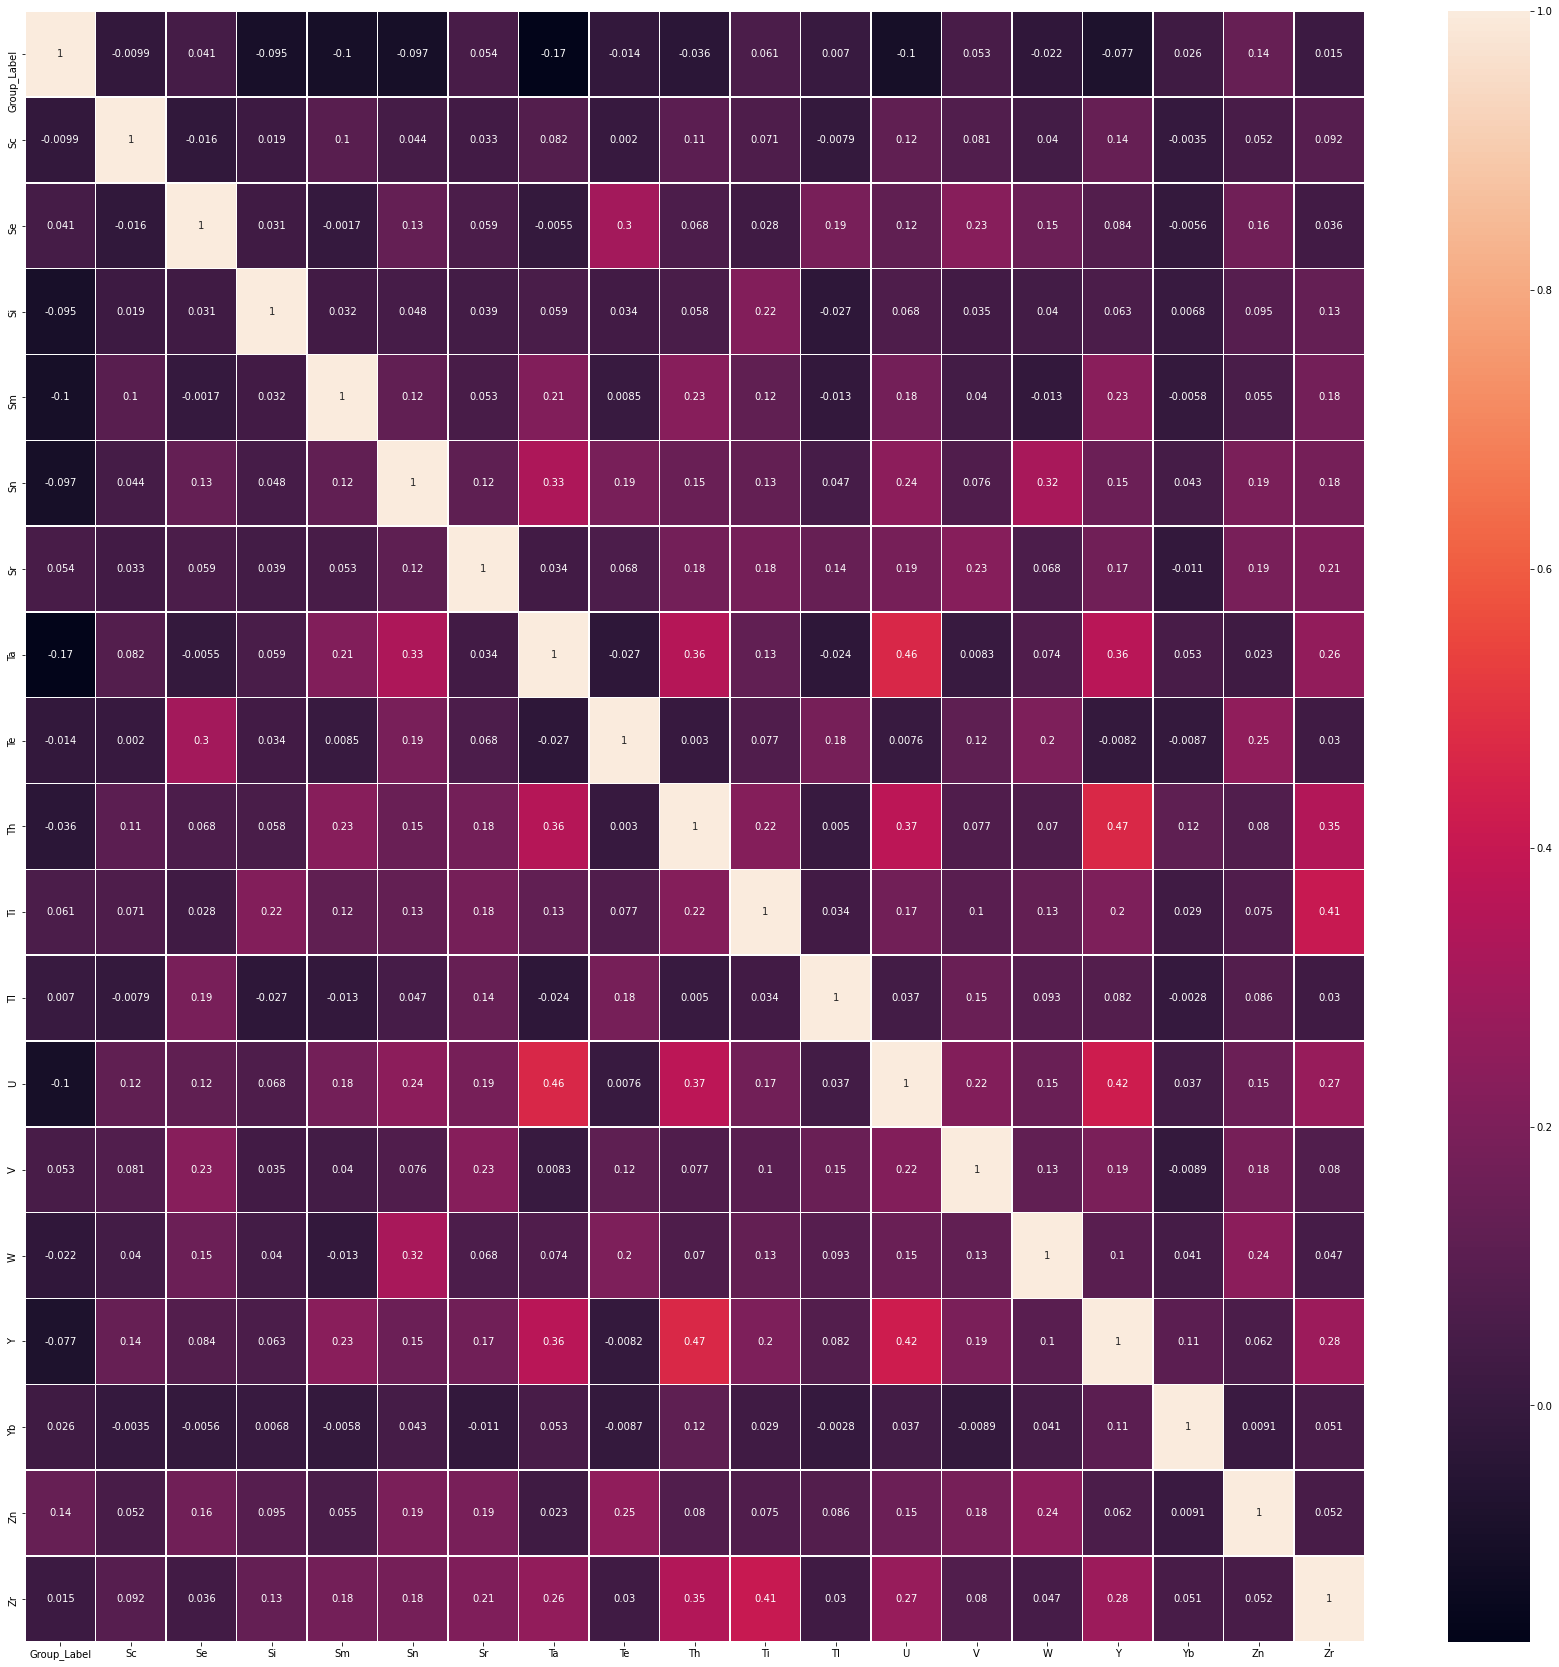

In [115]:
minarls_list = [['Group_Label','Ag', 'Al', 'As', 'Au','B','Ba', 'Be', 'Bi', 'Br','C', 'Ca', 'Cd', 'Ce', 'Cl','Co','Cr','Cs','Cu'],
['Group_Label','Dy','Er','F','Fe','Ga','Gd','Ge','H','Hf','Hg','I','In','Ir','K','La','Li','Mg','Mn','Mo'],
['Group_Label','N','Na','Nb','Nd','Ni','O','Os','P','Pb','Pd','Pr','Pt','Rb','Rh','Ru','S','Sb'],
['Group_Label','Sc','Se','Si','Sm','Sn','Sr','Ta','Te','Th','Ti','Tl','U','V','W','Y','Yb','Zn','Zr']]

for row in minarls_list:
    dataset_df1 = pd.DataFrame(dataset_df, columns =row)
    fig, ax = plt.subplots(figsize=(30,30))
    sns.heatmap(dataset_df1.corr(), annot=True, linewidths=.5, ax=ax)

In [16]:
dataset_only_high_Corr = dataset_df.copy()

In [17]:

for col in dataset_df.columns:
    current_corr = dataset_df[col].corr(dataset_df.Group_Label)
    if(current_corr<=0):
        dataset_only_high_Corr.drop(col,axis=1,inplace=True)
print(dataset_df.shape[1])

76


In [27]:
dataset_only_high_Corr.to_csv("dataset_only_high_Corr.csv")
dataset_only_high_Corr

,Climate,Latitude,Longitude,Ag,As,Au,Ba,Br,C,Ca,...,Sb,Se,Sr,Ti,Tl,V,Yb,Zn,Zr,Group_Label
0,15,31.261220,35.214581,1,0,0,1,0,1,1,...,0,0,1,1,0,1,0,1,1,7
1,15,32.620121,35.014771,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,15,31.795924,35.211981,0,0,0,0,0,1,1,...,0,0,0,1,0,1,0,0,1,7
3,15,32.607559,35.289086,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,7
4,7,31.261220,35.214581,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,13,47.204830,12.247430,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,5
1604,15,47.056400,11.908560,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,5
1605,12,40.878890,115.344720,1,1,1,0,0,1,1,...,1,0,0,0,0,0,0,1,0,6
1606,2,34.458330,110.083330,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,7


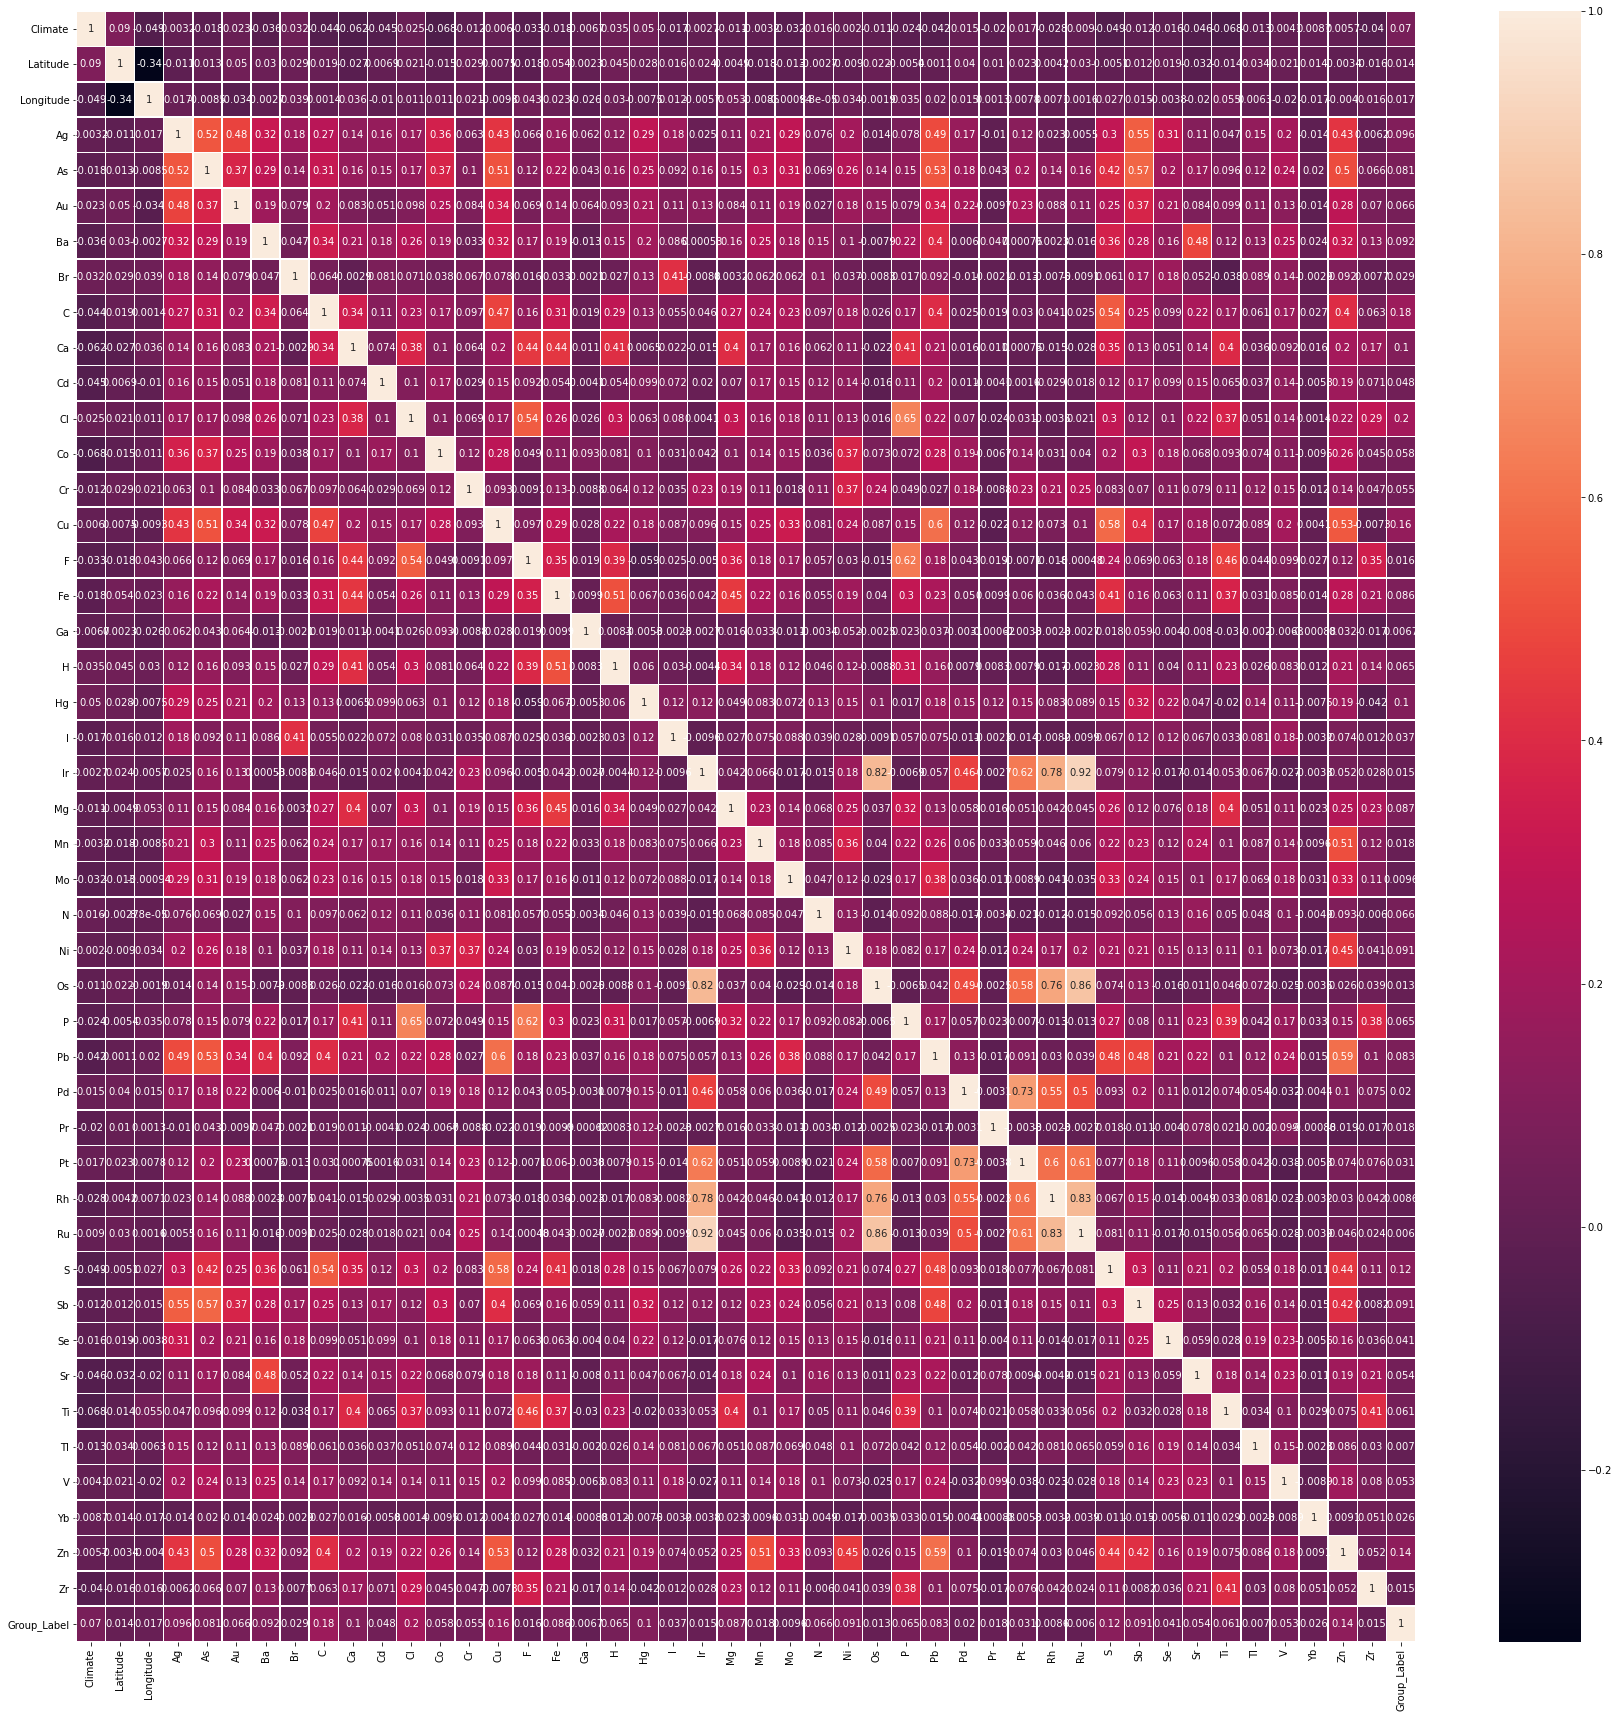

In [26]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(dataset_only_high_Corr.corr(), annot=True, linewidths=.5, ax=ax)